In [2]:
#------------------------------------------------------------------ 
# Script to evaluate the electronic energy of a set of geometries
#------------------------------------------------------------------ 

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

2024-02-14 08:42:51.115730: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-14 08:42:51.147296: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-14 08:42:51.271138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 08:42:51.271183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 08:42:51.300715: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [13]:
# Results of simulations

N_list = [20,32,47,76,100,139,190,237]
E0 = [-0.4893036748580491, -1.7388022200128364, -1.8686850530646084, -2.4303845343543498, -3.029223588588915, -2.77, -3.2533753945305803,-3.0339059553388874]
E0_error = [0.03150956247763711, 0.031139834787635316, 0.047993426114313835, 0.016869762876712862, 0.022966614637962266, 0.024436, 0.010757441587227948,0.012726552028066525]

# Results of simulations at 200 K

N_list_200 = [20,32,47,76,100]
E0_200 = [-0.5026653346158526,-1.66772140259357, -1.214595877969307,-2.4710027017944376,-2.800165854436924]
E0_error_200 = [0.042250674004753117,0.0169545067509585, 0.04611677023988595,0.02309635385792463,0.02019793988897871]


Bulk Energy (eV): -3.542565976422533


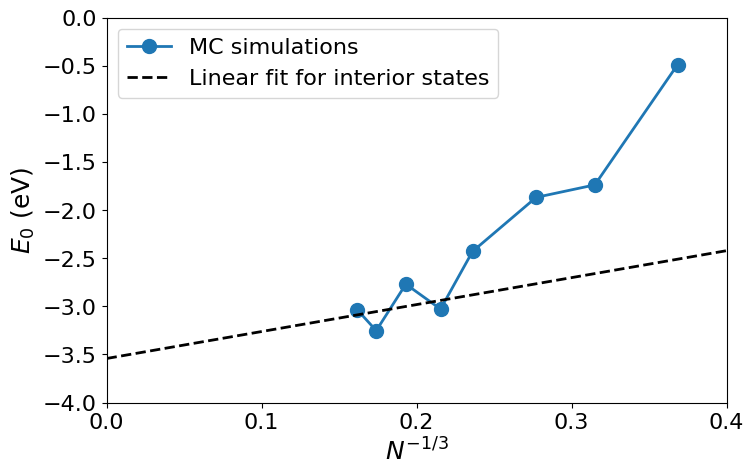

In [68]:
# Plot E vs N^(-1/3)

plt.figure(figsize=(8,5))

# Abscisa variable
N_array = np.array(N_list)
N13 = N_array**(-1.0/3)
#print(N13)

# Abscisa variable T=200
N_array_200 = np.array(N_list_200)
N13_200 = N_array_200**(-1.0/3)

# Linear fit
fit = np.polyfit(N13[4:],E0[4:],1)
x_points = np.linspace(0,0.4,100)
y_points = fit[0]*x_points + fit[1]

plt.plot(N13,E0,'-o',label='MC simulations',markersize=10,linewidth=2)
plt.plot(x_points,y_points,'k--',label='Linear fit for interior states',linewidth=2)

plt.xlim([0,0.4])
plt.ylim([-4,0])
plt.xlabel('$N^{-1/3}$',fontsize=18)
plt.ylabel('$E_0$ (eV)',fontsize=18)
plt.xticks(np.arange(0, 0.401, step=0.1),fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left',fontsize=16)

print()
print('Bulk Energy (eV): '+str(fit[1]))

In [5]:
N13[4:]

array([0.21544347, 0.19304641, 0.17394641, 0.16159102])


Bulk Energy (eV): -3.542565976422533


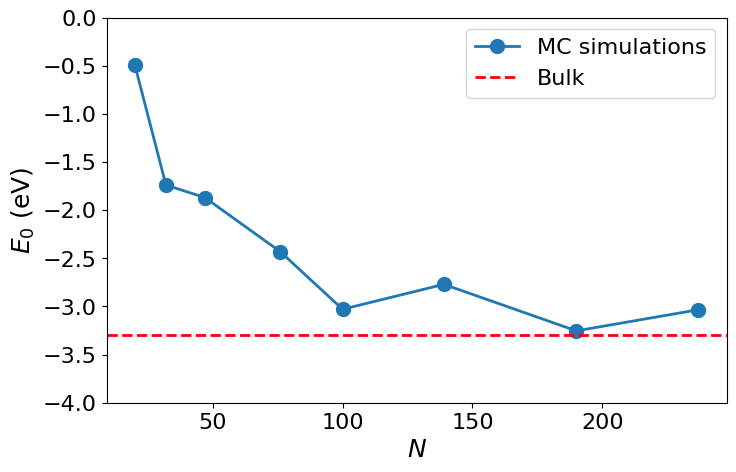

In [70]:
# Plot E vs N^(-1/3)

plt.figure(figsize=(8,5))

# Linear fit
fit = np.polyfit(N13[4:],E0[4:],1)
x_points = np.linspace(0,0.4,100)
y_points = fit[0]*x_points + fit[1]

plt.plot(N_list,E0,'-o',label='MC simulations',linewidth=2,markersize=10)
plt.axhline(y=-3.3, color='r', linestyle='--',label='Bulk',linewidth=2)

plt.ylim([-4,0])
plt.xlabel('$N$',fontsize=18)
plt.ylabel('$E_0$ (eV)',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right',fontsize=16)

print()
print('Bulk Energy (eV): '+str(fit[1]))

[20, 32, 47, 76, 100, 139, 190, 237]


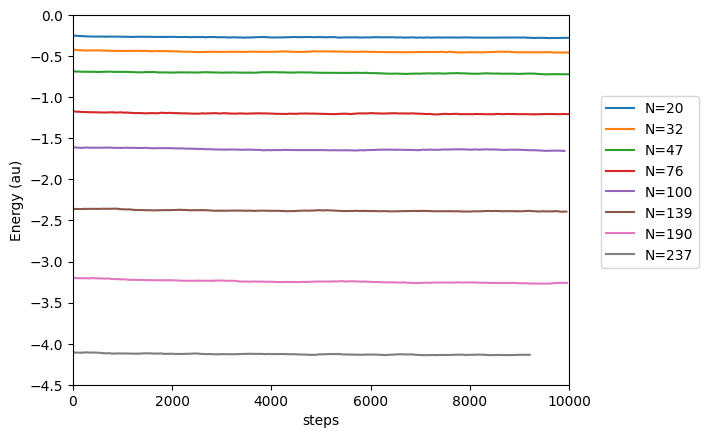

In [22]:
# Plot Energy vs step

print(N_list)

for N in N_list:

    file_name = './E-N'+str(N)+'-T100.dat'
    Efile = open(file_name,'r')
    Eat_list = []
    Eel_list = []
    nstep_list = []
    for line in Efile:
        columns = line.split()
        nstep = int(columns[0])
        nstep_list.append(nstep)
        Eat = float(columns[1])
        Eel = float(columns[2])
        Eat_list.append(Eat)
        Eel_list.append(Eel)

        Eat_array = np.array(Eat_list)
        Eel_array = np.array(Eel_list)


    plt.plot(nstep_list,Eat_array,label='N='+str(N))

plt.xlabel('steps')
plt.ylabel('Energy (au)')
plt.xlim(0,10000)
plt.ylim(-4.5,0)
plt.legend(bbox_to_anchor=(1.05, 0.8))


[20, 32, 47, 76, 100, 139, 190, 237]


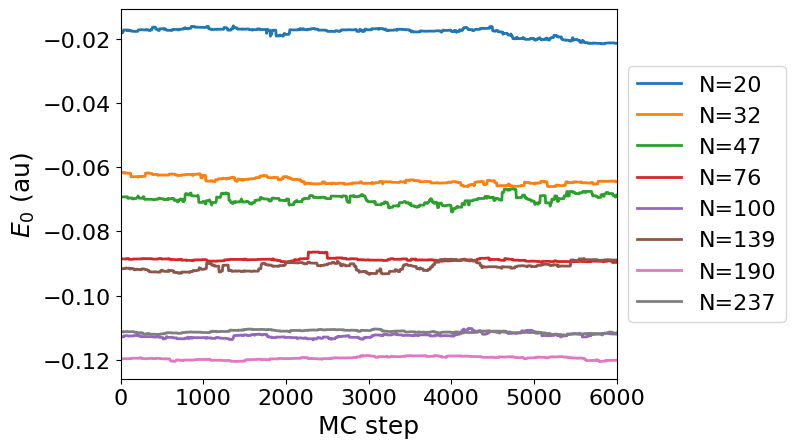

In [111]:
# Plot Energy vs step

#plt.figure(figsize=(9,3))

print(N_list)

for N in N_list:

    file_name = './E-N'+str(N)+'-T100.dat'
    Efile = open(file_name,'r')
    Eat_list = []
    Eel_list = []
    nstep_list = []
    for line in Efile:
        columns = line.split()
        nstep = int(columns[0])
        nstep_list.append(nstep)
        Eat = float(columns[1])
        Eel = float(columns[2])
        Eat_list.append(Eat)
        Eel_list.append(Eel)

        Eat_array = np.array(Eat_list)
        Eel_array = np.array(Eel_list)


    plt.plot(nstep_list,Eel_array,label='N='+str(N),linewidth=2)

plt.xlabel('MC step',fontsize=18)
plt.ylabel('$E_0$ (au)',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,6000)
#plt.ylim(-4.5,0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16)


(array([-11.5, -11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ]),
 [Text(0, -11.5, '−11.5'),
  Text(0, -11.0, '−11.0'),
  Text(0, -10.5, '−10.5'),
  Text(0, -10.0, '−10.0'),
  Text(0, -9.5, '−9.5'),
  Text(0, -9.0, '−9.0'),
  Text(0, -8.5, '−8.5'),
  Text(0, -8.0, '−8.0')])

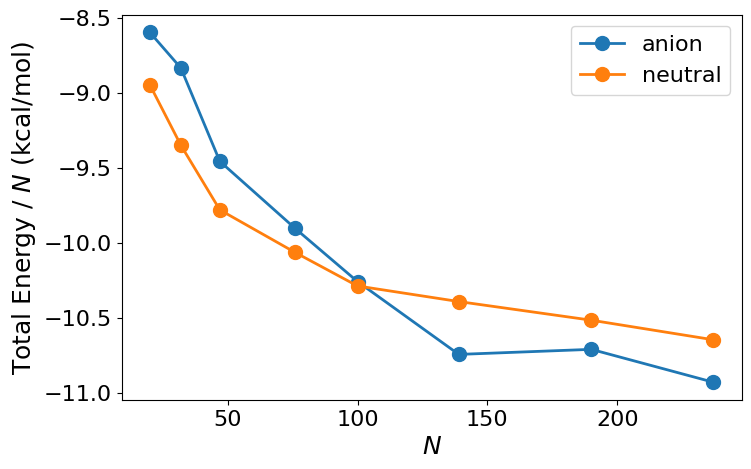

In [118]:
# Plot Eneryg/N vs N

E_neutral = [-8.9465,-9.3511,-9.7819,-10.066,-10.2892,-10.3932, -10.5174,-10.648]
E_neutral_error = [0.0192,0.0239,0.0458,0.0479, 0.0222, 0.0382, 0.0093, 0.0217]

E_avrg = []
for N in N_list:

    file_name = './E-N'+str(N)+'-T100.dat'
    Efile = open(file_name,'r')
    #Eat_list = []
    #Eel_list = []
    #nstep_list = []
    Etotal = 0
    nsteps_total = 0
    for line in Efile:
        columns = line.split()
        nstep = int(columns[0])
        #nstep_list.append(nstep)
        Eat = float(columns[1])
        Eel = float(columns[2])
        #Eat_list.append(Eat)
        #Eel_list.append(Eel)
        #Eat_array = np.array(Eat_list)
        #Eel_array = np.array(Eel_list)

        Etotal = Etotal + Eat
        nsteps_total = nsteps_total + 1
    
    E_avrg.append(Etotal/nsteps_total)
N_array = np.array(N_list)
E_avrg = np.array(E_avrg)

plt.figure(figsize=(8,5))
#plt.plot(N_array,E_avrg/N_array*au_to_kcalmol,'-o',label='MC simulations of $(H_2O)_N^-$')
#plt.plot(N_array,E_neutral,'-o',label='MD simulations of $(H_2O)_N$')
plt.plot(N_array,E_avrg/N_array*au_to_kcalmol,'-o',label='anion',linewidth=2,markersize=10)
plt.plot(N_array,E_neutral,'-o',label='neutral',linewidth=2,markersize=10)
#plt.errorbar(N_array_200,E_neutral,yerr=E_neutral_error,fmt='-o')

plt.xlabel('$N$',fontsize=18)
plt.ylabel('Total Energy / $N$ (kcal/mol)',fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
